<a href="https://colab.research.google.com/github/myschl/ML-DL/blob/master/CNN_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from tensorflow.keras import layers, models
from tensorflow.keras.utils import normalize
from keras.utils import to_categorical
from keras import regularizers
import pandas as pd
import numpy as np
from keras.datasets import mnist
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [0]:
# mnist_train = pd.read_csv('/content/sample_data/mnist_train_small.csv')
# mnist_test = pd.read_csv('/content/sample_data/mnist_test.csv')

(X_train, y_train),(X_valid, y_valid) = mnist.load_data()


# Tensors Normalization
# X_train = normalize(X_train)
# y_train = normalize(y_train)

# X_valid = normalize(X_valid)
# y_valid = normalize(y_valid)

X_train = X_train.reshape((60000, 28, 28, 1))
X_train = X_train.astype('float32')/255

X_valid = X_valid.reshape((10000, 28, 28, 1))
X_valid = X_valid.astype('float32')/255

# label to categorical
y_train  = to_categorical(y_train)
y_valid  = to_categorical(y_valid)


# X_train = np.asarray(X_train)
# y_train = np.asarray(y_train)

# X_valid = np.asarray(X_valid).astype('float32')
# y_valid = np.asarray(y_valid).astype('float32')

In [145]:
y_train.shape

(60000, 10)

In [0]:
plt.imshow(X_train[300], cmap = plt.cm.binary)
plt.show()

In [0]:
from keras import layers
from keras import models


covmodel = models.Sequential()
covmodel.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=[28, 28, 1]))
covmodel.add(layers.MaxPooling2D((2, 2)))
covmodel.add(layers.Conv2D(64, (3, 3), activation='relu'))
covmodel.add(layers.MaxPooling2D((2, 2)))
covmodel.add(layers.Conv2D(64, (3,3), activation='relu'))

In [0]:
# covmodel.summary()

In [0]:
covmodel.add(layers.Flatten())
covmodel.add(layers.Dense(64, activation='relu'))
covmodel.add(layers.Dense(10, activation='softmax'))

In [148]:
covmodel.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_74 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_52 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_75 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_53 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_76 (Conv2D)           (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_14 (Flatten)         (None, 576)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 64)              

In [0]:
covmodel.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])


In [150]:
History = covmodel.fit(X_train, y_train, 
                       epochs=5, 
                       batch_size=128,
                       validation_data=(X_valid, y_valid) )

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 50s 829us/step - loss: 0.2340 - acc: 0.9276 - val_loss: 0.0650 - val_acc: 0.9789
Epoch 2/5
60000/60000 [==============================] - 49s 816us/step - loss: 0.0562 - acc: 0.9824 - val_loss: 0.0362 - val_acc: 0.9876
Epoch 3/5
60000/60000 [==============================] - 49s 814us/step - loss: 0.0384 - acc: 0.9879 - val_loss: 0.0282 - val_acc: 0.9910
Epoch 4/5
60000/60000 [==============================] - 49s 821us/step - loss: 0.0291 - acc: 0.9910 - val_loss: 0.0324 - val_acc: 0.9904
Epoch 5/5
60000/60000 [==============================] - 49s 823us/step - loss: 0.0226 - acc: 0.9932 - val_loss: 0.0380 - val_acc: 0.9890


In [79]:
# test_acc = covmodel.evaluate(X_valid, y_valid)
# test_acc


10000/10000 [==============================] - 3s 296us/step


[0.9344702991589904, 0.9412]

In [0]:
History.history

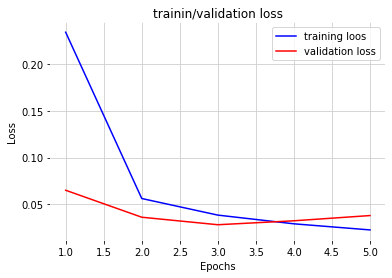

In [151]:
history_dict2 = History.history
loss_values2 = history_dict2['loss']
val_loss_values2 = history_dict2['val_loss']

epochs = range(1, 5 + 1)
plt.plot(epochs, loss_values2, 'b-', label='training loos')
plt.plot(epochs, val_loss_values2, 'r-', label='validation loss')
plt.title('trainin/validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['axes.edgecolor'] = 'white'
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 1
plt.rcParams['grid.color'] = "#cccccc"
plt.show()

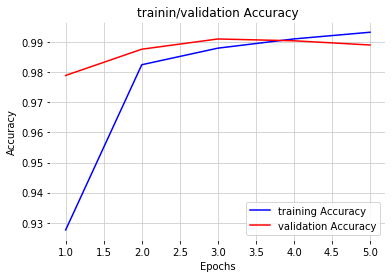

In [152]:
history_dict2 = History.history
acc_values2 = history_dict2['acc']
val_acc_values2 = history_dict2['val_acc']

epochs = range(1, 5 + 1)
plt.plot(epochs, acc_values2, 'b-', label='training Accuracy')
plt.plot(epochs, val_acc_values2, 'r-', label='validation Accuracy')
plt.title('trainin/validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['axes.edgecolor'] = 'white'
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 1
plt.rcParams['grid.color'] = "#cccccc"
plt.show()